# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('data/input/input_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,HUPLxM,HUPLxHM,HUnbStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,AUPLxM,AUPLxAM,AUnbStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,Venue
0,2012-08-18,arsenal,sunderland,0,0,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.5,8.5,D,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67,Emirates Stadium
1,2012-09-01,swansea,sunderland,2,2,14,4,10,3,11,7,8,0,1,1,1,0,2.20,3.3,3.4,D,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,73,73,73,73.00,74,75,77,75.33,Swansea.com Stadium
2,2012-09-22,west-ham,sunderland,1,1,20,4,11,2,12,10,10,1,2,1,0,0,2.10,3.3,3.6,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0,71,73,75,73.00,74,75,77,75.33,Boleyn Ground
3,2012-10-06,city,sunderland,3,0,26,8,16,6,10,10,15,4,0,3,0,0,1.29,5.5,11.0,W,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,81,83,85,83.00,74,75,77,75.33,Etihad Stadium
4,2012-10-27,stoke,sunderland,0,0,11,6,6,3,12,6,7,3,2,2,0,0,1.95,3.3,4.2,D,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,75,76,75,75.33,74,75,77,75.33,Bet365 Stadium


In [4]:
df.shape

(3800, 72)

In [5]:
df = df[[
         'HDays', 'ADays',
         'HASLxM', 'HASTLxM', 
         'HACLxM', 'HAFLxM', 'HAYCLxM', 'HARCLxM',
         'HAGSLxM', 'HAGCLxM', 'HAGSLxHM', 'HAGCLxHM',
         'HGDLxM', 'HGDLxHM', 'HAPLxM', 'HAPLxHM',
         'HWPLxM', 'HWPLxHM',
         'HWinStreak',
         'HUPLxM', 'HUPLxHM', 
         'HUnbStreak',
         'AASLxM', 'AASTLxM', 
         'AACLxM', 'AAFLxM', 'AAYCLxM', 'AARCLxM',
         'AAGSLxM', 'AAGCLxM', 'AAGSLxAM', 'AAGCLxAM',
         'AGDLxM', 'AGDLxAM', 'AAPLxM','AAPLxAM',
         'AWPLxM', 'AWPLxAM', 
         'AWinStreak',
         'AUPLxM', 'AUPLxAM',
         'AUnbStreak',
         'HDef', 'HMid', 'HAtt', 'HOvr',
         'ADef', 'AMid', 'AAtt', 'AOvr',
         'B365H', 'B365D', 'B365A',
         'Venue',
         'Result'
        ]]

df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,HUPLxM,HUPLxHM,HUnbStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,AUPLxM,AUPLxAM,AUnbStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Venue,Result
0,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67,1.40,4.5,8.5,Emirates Stadium,D
1,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,73,73,73,73.00,74,75,77,75.33,2.20,3.3,3.4,Swansea.com Stadium,D
2,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0,71,73,75,73.00,74,75,77,75.33,2.10,3.3,3.6,Boleyn Ground,D
3,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,81,83,85,83.00,74,75,77,75.33,1.29,5.5,11.0,Etihad Stadium,W
4,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,75,76,75,75.33,74,75,77,75.33,1.95,3.3,4.2,Bet365 Stadium,D


In [6]:
df.shape

(3800, 55)

In [7]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,HUPLxM,HUPLxHM,HUnbStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,AUPLxM,AUPLxAM,AUnbStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Venue,Result
0,3,4,18.2,10.4,8.2,9.6,1.3,0.0,1.8,1.1,1.4,1.0,7.0,4.0,1.7,1.5,50.0,40.0,1.0,70.0,70.0,1.0,13.4,8.4,5.9,11.8,1.6,0.0,1.4,1.5,1.0,1.4,-1.0,-4.0,1.3,1.0,40.0,20.0,0.0,50.0,60.0,0.0,79,80,79,79.33,74,75,77,75.33,1.40,4.5,8.5,Anfield,W
1,7,7,11.7,6.0,5.1,11.4,1.5,0.1,1.1,1.9,1.3,2.0,-8.0,-7.0,0.8,0.9,20.0,20.0,0.0,40.0,50.0,1.0,12.7,8.2,5.7,10.8,1.2,0.0,1.2,1.3,1.0,1.7,-1.0,-7.0,1.3,0.9,40.0,20.0,1.0,50.0,50.0,1.0,74,70,72,72.00,74,75,77,75.33,2.15,3.4,3.8,DW Stadium,L
2,3,4,6.2,3.2,3.9,10.8,1.5,0.0,1.1,1.8,1.8,1.9,-7.0,-1.0,1.1,1.4,30.0,30.0,0.0,50.0,80.0,3.0,11.2,7.5,4.9,10.9,1.2,0.0,1.4,1.3,1.1,1.7,1.0,-6.0,1.6,1.1,50.0,30.0,0.0,60.0,50.0,3.0,70,70,73,71.00,74,75,77,75.33,2.50,3.4,3.0,Madejski Stadium,W
3,10,10,12.4,6.8,6.0,11.0,1.5,0.1,1.2,1.4,1.3,1.2,-2.0,1.0,1.1,1.4,30.0,40.0,1.0,50.0,60.0,1.0,10.4,6.7,5.1,11.1,1.5,0.0,1.1,1.3,1.1,1.8,-2.0,-7.0,1.3,1.0,40.0,30.0,0.0,50.0,40.0,0.0,71,75,74,73.33,74,75,77,75.33,2.05,3.5,4.0,The Hawthorns,W
4,7,7,10.4,5.3,4.0,9.7,1.5,0.0,0.6,1.3,0.6,1.3,-7.0,-7.0,1.0,0.8,20.0,10.0,1.0,60.0,60.0,1.0,10.3,6.3,4.9,10.4,1.4,0.0,1.2,1.4,1.2,1.7,-2.0,-5.0,1.1,1.0,30.0,30.0,0.0,50.0,40.0,1.0,74,74,79,75.67,74,75,77,75.33,2.25,3.4,3.5,Loftus Road,W


In [8]:
df.shape

(3324, 55)

# 3. Feature Selection

In [9]:
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

## 3.1 BORUTA Feature Selection

In [10]:
df.shape

(3324, 55)

In [11]:
# We drop variables related to team form specifically in home matches or away matches.
# We take HUnbStreak instead of HWinStreak
# We take AUnbStreak instead of AWinStreak

df = df[[
         'HDays', 'ADays', 
         'HASLxM', 'HASTLxM', 'HACLxM', 'HAFLxM', 'HAYCLxM',
         'HARCLxM', 'HAGSLxM', 'HAGCLxM', 'HGDLxM', 'HAPLxM', 'HWPLxM', 
         'HUPLxM', 'HUnbStreak',
         'AASLxM', 'AASTLxM', 'AACLxM', 'AAFLxM', 'AAYCLxM', 
         'AARCLxM', 'AAGSLxM', 'AAGCLxM', 'AGDLxM', 'AAPLxM', 'AWPLxM',
         'AUPLxM', 'AUnbStreak',
         'HOvr', 'AOvr', 
         'B365H', 'B365D', 'B365A',
         'Venue',
         'Result'
        ]]

In [12]:
df.shape

(3324, 35)

In [13]:
from sklearn.preprocessing import LabelEncoder

# label encode venue categorical data
venue_le = LabelEncoder()
df['Venue'] = venue_le.fit_transform(df['Venue'])

In [14]:
dict(zip(venue_le.classes_, range(len(venue_le.classes_))))

{'Anfield': 0,
 'Bet365 Stadium': 1,
 'Boleyn Ground': 2,
 'Bramall Lane': 3,
 'Brentford Community Stadium': 4,
 'Cardiff City Stadium': 5,
 'Carrow Road': 6,
 'Craven Cottage': 7,
 'DW Stadium': 8,
 'Dean Court': 9,
 'Elland Road': 10,
 'Emirates Stadium': 11,
 'Etihad Stadium': 12,
 'Falmer Stadium': 13,
 'Goodison Park': 14,
 'Hull City Stadium': 15,
 'King Power Stadium': 16,
 'Kirklees Stadium': 17,
 'Loftus Road': 18,
 'London Stadium': 19,
 'Madejski Stadium': 20,
 'Molineux Stadium': 21,
 'Old Trafford': 22,
 'Riverside Stadium': 23,
 'Selhurst Park': 24,
 "St Mary's Stadium": 25,
 'St. James Park': 26,
 'Stadium of Light': 27,
 'Stamford Bridge': 28,
 'Swansea.com Stadium': 29,
 'The Hawthorns': 30,
 'Tottenham Hotspur Stadium': 31,
 'Turf Moor': 32,
 'Vicarage Road': 33,
 'Villa Park': 34,
 'Wembley Stadium': 35,
 'White Hart Lane': 36}

In [15]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [16]:
y = df.Result
X = df.drop("Result", 1)
colnames = X.columns

# using the BorutaPy function
rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

boruta_score

C:\Users\choibs\AppData\Local\Temp\ipykernel_6680\592268983.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Result", 1)


,Features,Score
17,AACLxM,1.00
21,AAGSLxM,1.00
16,AASTLxM,1.00
15,AASLxM,1.00
24,AAPLxM,1.00
25,AWPLxM,1.00
28,HOvr,1.00
11,HAPLxM,1.00
10,HGDLxM,1.00
29,AOvr,1.00


In [17]:
# drop features with less than 0.8
selected_features = boruta_score[boruta_score['Score'] >= 0.8]['Features'].tolist()
selected_features.append('Result')

df = df[selected_features]

In [18]:
df.head()

,AACLxM,AAGSLxM,AASTLxM,AASLxM,AAPLxM,AWPLxM,HOvr,HAPLxM,HGDLxM,AOvr,HAGSLxM,B365H,B365D,B365A,HACLxM,HASTLxM,HASLxM,AGDLxM,Venue,HUPLxM,AAGCLxM,Result
0,5.9,1.4,8.4,13.4,1.3,40.0,79.33,1.7,7.0,75.33,1.8,1.40,4.5,8.5,8.2,10.4,18.2,-1.0,0,70.0,1.5,W
1,5.7,1.2,8.2,12.7,1.3,40.0,72.00,0.8,-8.0,75.33,1.1,2.15,3.4,3.8,5.1,6.0,11.7,-1.0,8,40.0,1.3,L
2,4.9,1.4,7.5,11.2,1.6,50.0,71.00,1.1,-7.0,75.33,1.1,2.50,3.4,3.0,3.9,3.2,6.2,1.0,20,50.0,1.3,W
3,5.1,1.1,6.7,10.4,1.3,40.0,73.33,1.1,-2.0,75.33,1.2,2.05,3.5,4.0,6.0,6.8,12.4,-2.0,30,50.0,1.3,W
4,4.9,1.2,6.3,10.3,1.1,30.0,75.67,1.0,-7.0,75.33,0.6,2.25,3.4,3.5,4.0,5.3,10.4,-2.0,18,60.0,1.4,W


In [19]:
df.shape

(3324, 22)

## 3.2 Correlation Analysis

C:\Users\choibs\AppData\Local\Temp\ipykernel_6680\3633589625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True)


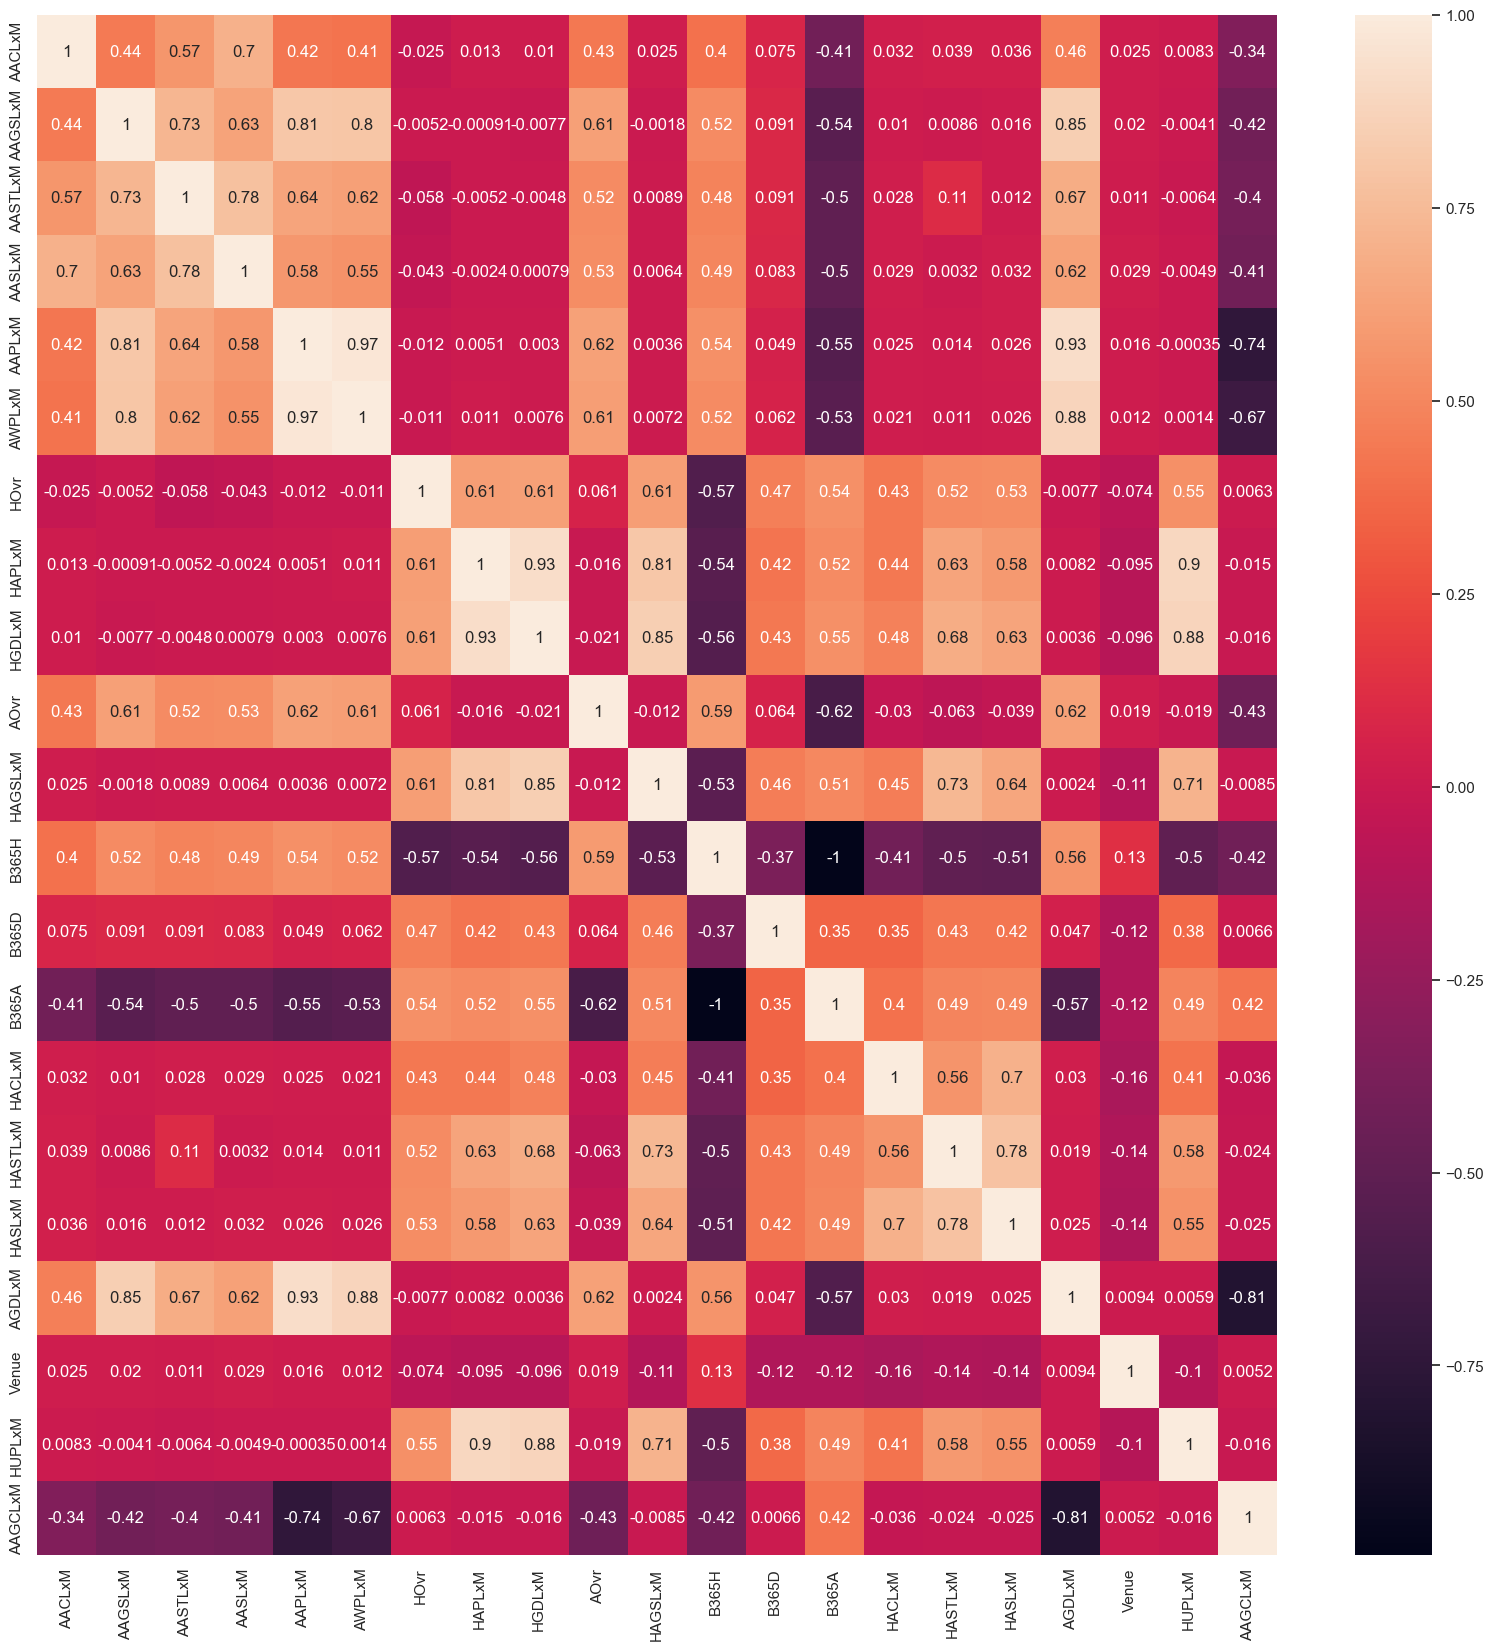

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [21]:
# Take one of HAPLxM, HGDLxM, HAGSLxM, HUPLxM
# Take one of HASLxM, HASTLxM, HACLxM
# Take one of AAGSLxM, AAPLxM, AWPLxM, AGDLxM
# Take one of AASLxM, AASTLxM, AAcLxM
# Take one of B365H and B365A
# Take one of AGDLxM and AAGCLxM

df = df.drop([
              'HAPLxM', 'HGDLxM', 'HAGSLxM',
              'HASTLxM', 'HACLxM',
              'AAGSLxM', 'AAPLxM', 'AWPLxM',
              'AASTLxM', 'AACLxM',
              'B365A',
              'AAGCLxM',
             ], axis=1)

In [22]:
df.shape

(3324, 10)

C:\Users\choibs\AppData\Local\Temp\ipykernel_6680\1630617456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True)


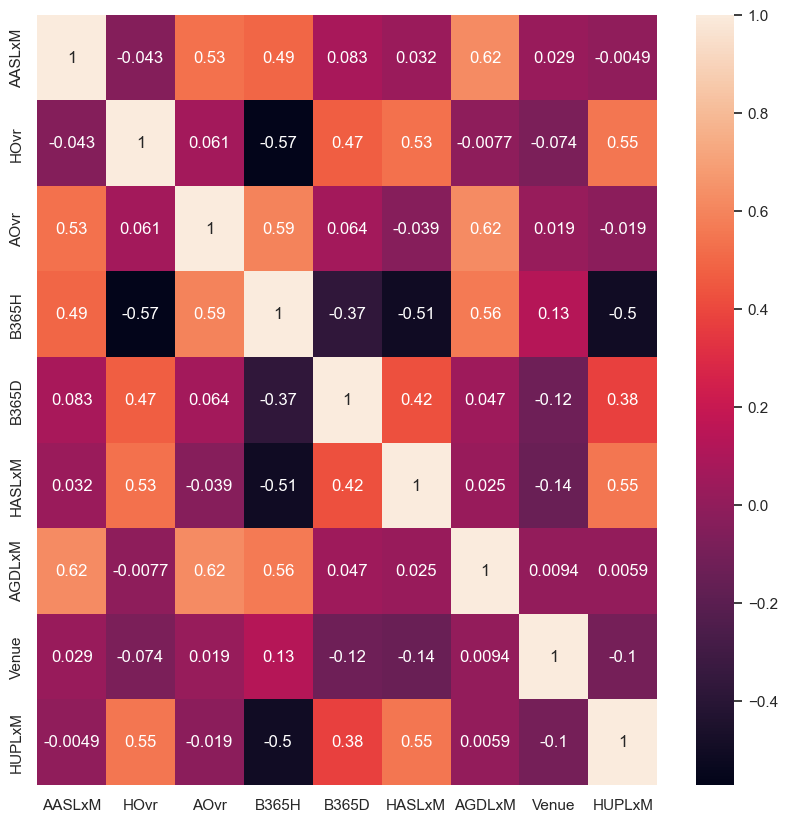

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [24]:
df.head()

,AASLxM,HOvr,AOvr,B365H,B365D,HASLxM,AGDLxM,Venue,HUPLxM,Result
0,13.4,79.33,75.33,1.40,4.5,18.2,-1.0,0,70.0,W
1,12.7,72.00,75.33,2.15,3.4,11.7,-1.0,8,40.0,L
2,11.2,71.00,75.33,2.50,3.4,6.2,1.0,20,50.0,W
3,10.4,73.33,75.33,2.05,3.5,12.4,-2.0,30,50.0,W
4,10.3,75.67,75.33,2.25,3.4,10.4,-2.0,18,60.0,W


In [25]:
df.shape

(3324, 10)

## 3.3 BoxPlot Analysis

Next, we plot boxplots between all the features and the target variable (Result) to verify the relationship between all variables and the Result. The idea here is to identify and eliminate variables that do not contribute to the prediction of the Result variable.

In [26]:
df.columns

Index(['AASLxM', 'HOvr', 'AOvr', 'B365H', 'B365D', 'HASLxM', 'AGDLxM', 'Venue',
       'HUPLxM', 'Result'],
      dtype='object')

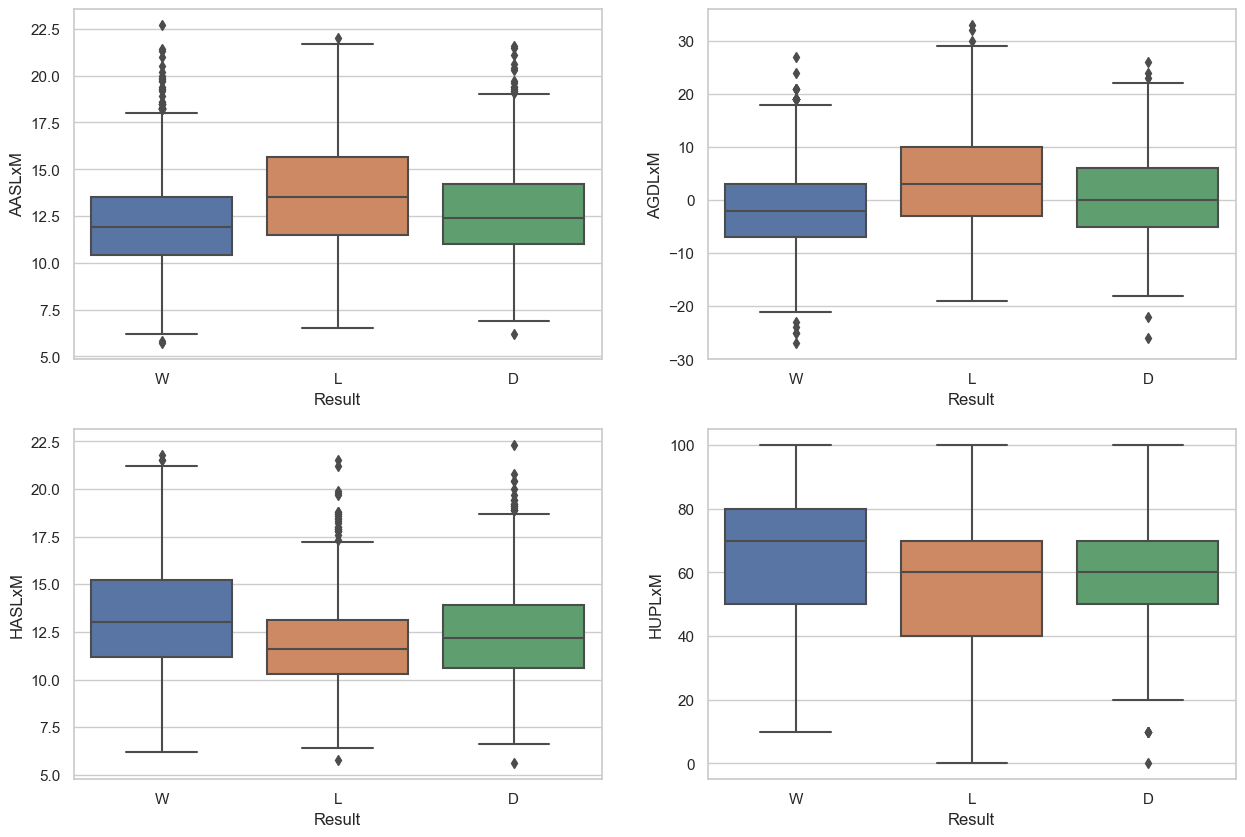

<Figure size 640x480 with 0 Axes>

In [27]:
# 'AASLxM', 'AGDLxM', 'HASLxM', 'HUPLxM'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["Result"], y=df['AASLxM'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Result"], y=df['AGDLxM'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Result"], y=df['HASLxM'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Result"], y=df['HUPLxM'])

plt.show()
plt.tight_layout()

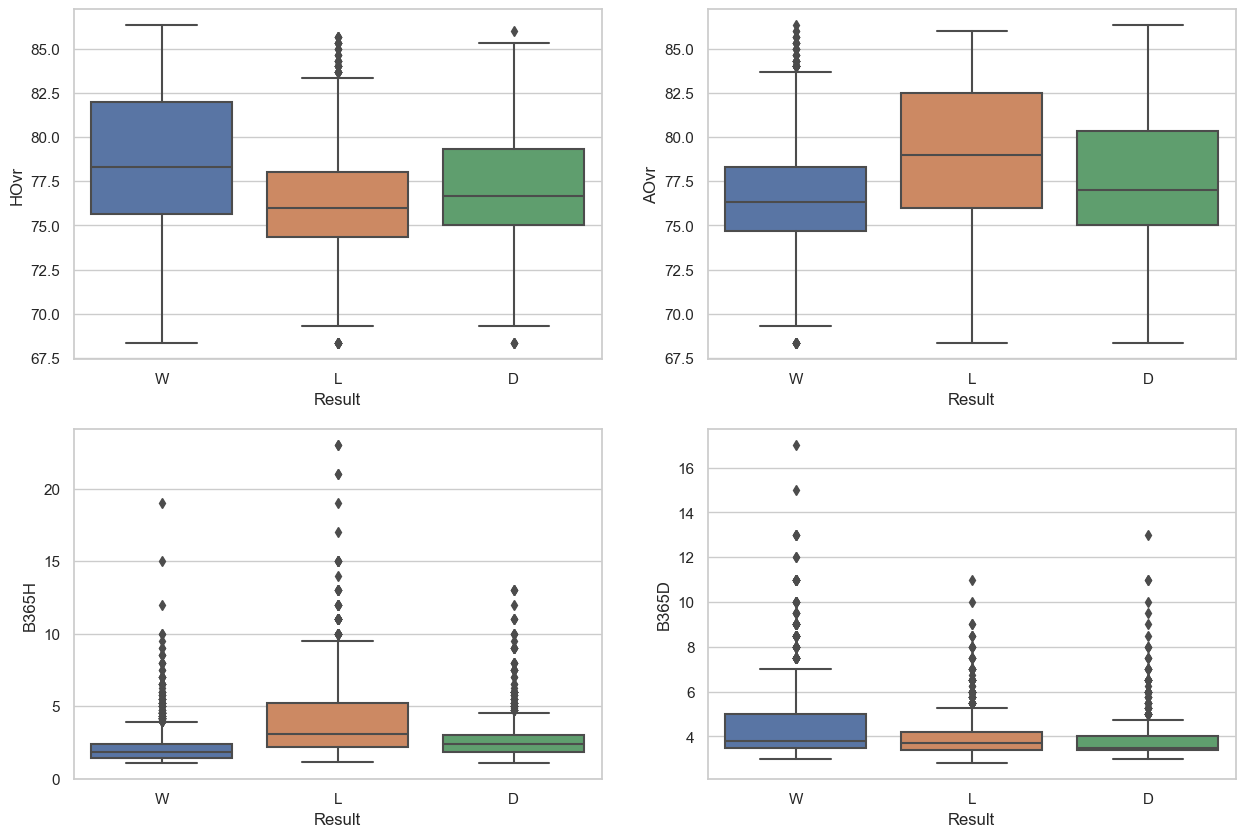

<Figure size 640x480 with 0 Axes>

In [28]:
# 'HOvr', 'AOvr', 'B365H', 'B365D',

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["Result"], y=df['HOvr'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Result"], y=df['AOvr'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Result"], y=df['B365H'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Result"], y=df['B365D'])

plt.show()
plt.tight_layout()

In [29]:
df.head()

,AASLxM,HOvr,AOvr,B365H,B365D,HASLxM,AGDLxM,Venue,HUPLxM,Result
0,13.4,79.33,75.33,1.40,4.5,18.2,-1.0,0,70.0,W
1,12.7,72.00,75.33,2.15,3.4,11.7,-1.0,8,40.0,L
2,11.2,71.00,75.33,2.50,3.4,6.2,1.0,20,50.0,W
3,10.4,73.33,75.33,2.05,3.5,12.4,-2.0,30,50.0,W
4,10.3,75.67,75.33,2.25,3.4,10.4,-2.0,18,60.0,W


In [30]:
df.shape

(3324, 10)

# 4. Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Finding Best Parameters for Models on Draw/ Non-Draw

In [32]:
# draw/ non-draw df
dnd_df = df.copy()

# label encode categorical data
dnd_df['Result'] = dnd_df['Result'].map({'D': 0, 'W': 1, 'L': 1})

In [33]:
# find the best parameter for each model on the whole dataset first

X = dnd_df.iloc[:, :-1]
y = dnd_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
dnd_sc = StandardScaler()
X_train.iloc[:, :] = dnd_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = dnd_sc.transform(X_test.iloc[:, :])

In [34]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}


In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}


### Finding Best Parameters for Models on Win/ Draw/ Lose

In [38]:
# win/draw/lose
wdl_df = df.copy()

# label encode categorical data
wdl_le = LabelEncoder()
wdl_df['Result'] = wdl_le.fit_transform(wdl_df['Result'])

In [39]:
dict(zip(wdl_le.classes_, range(len(wdl_le.classes_))))

{'D': 0, 'L': 1, 'W': 2}

In [40]:
# find the best parameter for each model on the whole dataset first

X = wdl_df.iloc[:, :-1]
y = wdl_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
wdl_sc = StandardScaler()
X_train.iloc[:, :] = wdl_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = wdl_sc.transform(X_test.iloc[:, :])

In [41]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}


In [42]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}


In [43]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 180}


### Finding Best Parameters for Models on Draw/ Lose

In [45]:
# win/draw/lose
dl_df = df.copy()

dl_df = dl_df[(dl_df['Result'] == 'D') | (dl_df['Result'] == 'L')]

# label encode categorical data
dl_le = LabelEncoder()
dl_df['Result'] = dl_le.fit_transform(dl_df['Result'])

In [46]:
dict(zip(dl_le.classes_, range(len(dl_le.classes_))))

{'D': 0, 'L': 1}

In [47]:
# find the best parameter for each model on the whole dataset first

X = dl_df.iloc[:, :-1]
y = dl_df.iloc[:, -1]

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# numerical value standardization
dl_sc = StandardScaler()
X_train.iloc[:, :] = dl_sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = dl_sc.transform(X_test.iloc[:, :])

In [48]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# get the best parameters
print(rf_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}


In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

# get the best parameters
print(lr_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
from sklearn.svm import SVC

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

# get the best parameters
print(svc_classifier.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

# get the best parameters
print(xgb_classifier.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 60}
